In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import print_function
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True
#import seaborn as sns
#sns.set()

import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("talk")
#sns.set_context("poster")
palette = sns.color_palette()

#plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'lines.linewidth':3})
#plt.rcParams.update({'usetex': True})

#cp = sns.color_palette()
plt.rcParams.update({'font.size': 22})

GetDist Version: 1.3.3, Matplotlib version: 3.4.3


In [30]:
#I just picked out a few examples from
#https://getdist.readthedocs.io/en/latest/plot_gallery.html
#and adapted to this case

In [2]:
import os
from glob import glob
PATH = './'
file_names = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], 'chain_*'))]
file_names

['.\\chain_SIHR']

In [3]:
#Quick convert to add an importance weight column left of -Log(like) column
for idx, file in enumerate(file_names):
    inChain = np.loadtxt(file,delimiter=' ')
    nsamps, npar = inChain.shape
    outChain = np.zeros((nsamps,npar+1))
    outChain[:,1:] = np.copy(inChain)
    outChain[:,0] = 1.
    np.savetxt('./convert_{}.txt'.format(idx+1),outChain)

In [4]:
samples = loadMCSamples('./convert',settings={'ignore_rows':4000})

.\convert_1.txt


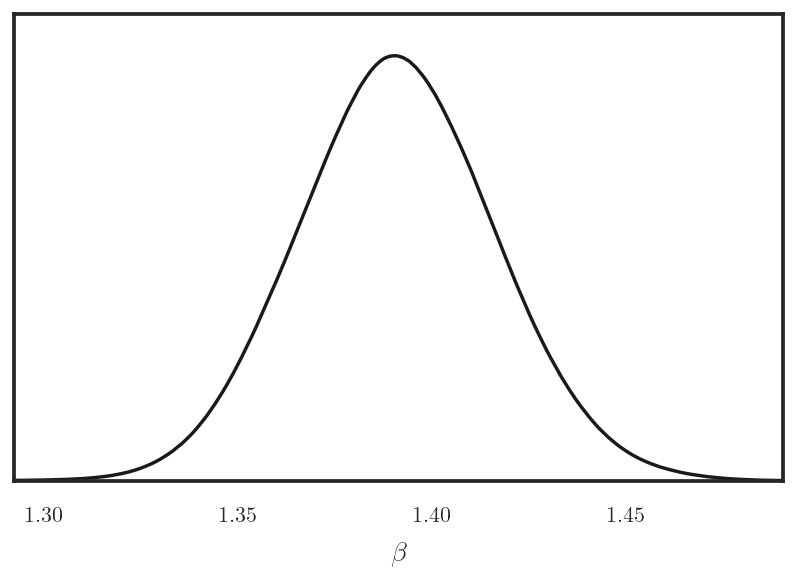

In [36]:
# 1D marginalized plot
g = plots.get_single_plotter(width_inch=6)
g.plot_1d(samples, 'p1')

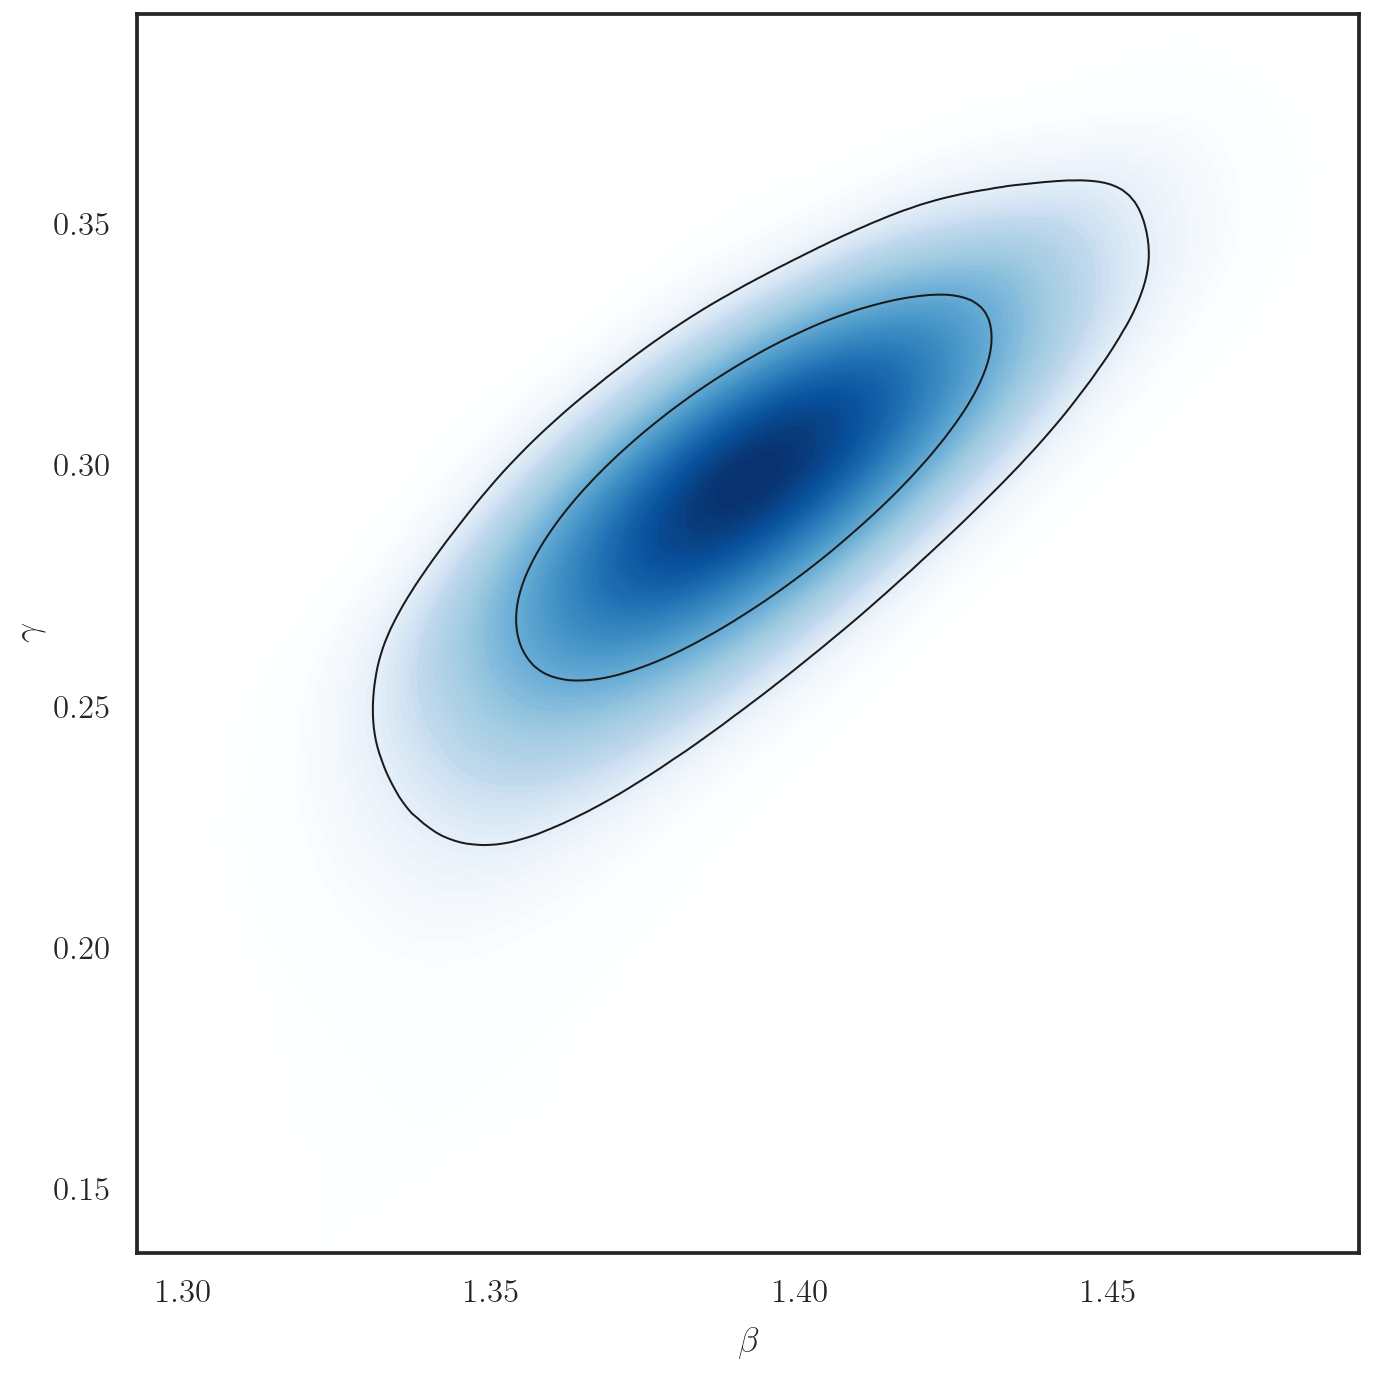

In [37]:
from getdist import plots
g = plots.getSinglePlotter(ratio = 1, width_inch= 10,scaling = False,rc_sizes = True)
g.plot_2d(samples, ['p1', 'p2'],shaded=True)
g.export('Param.pdf')

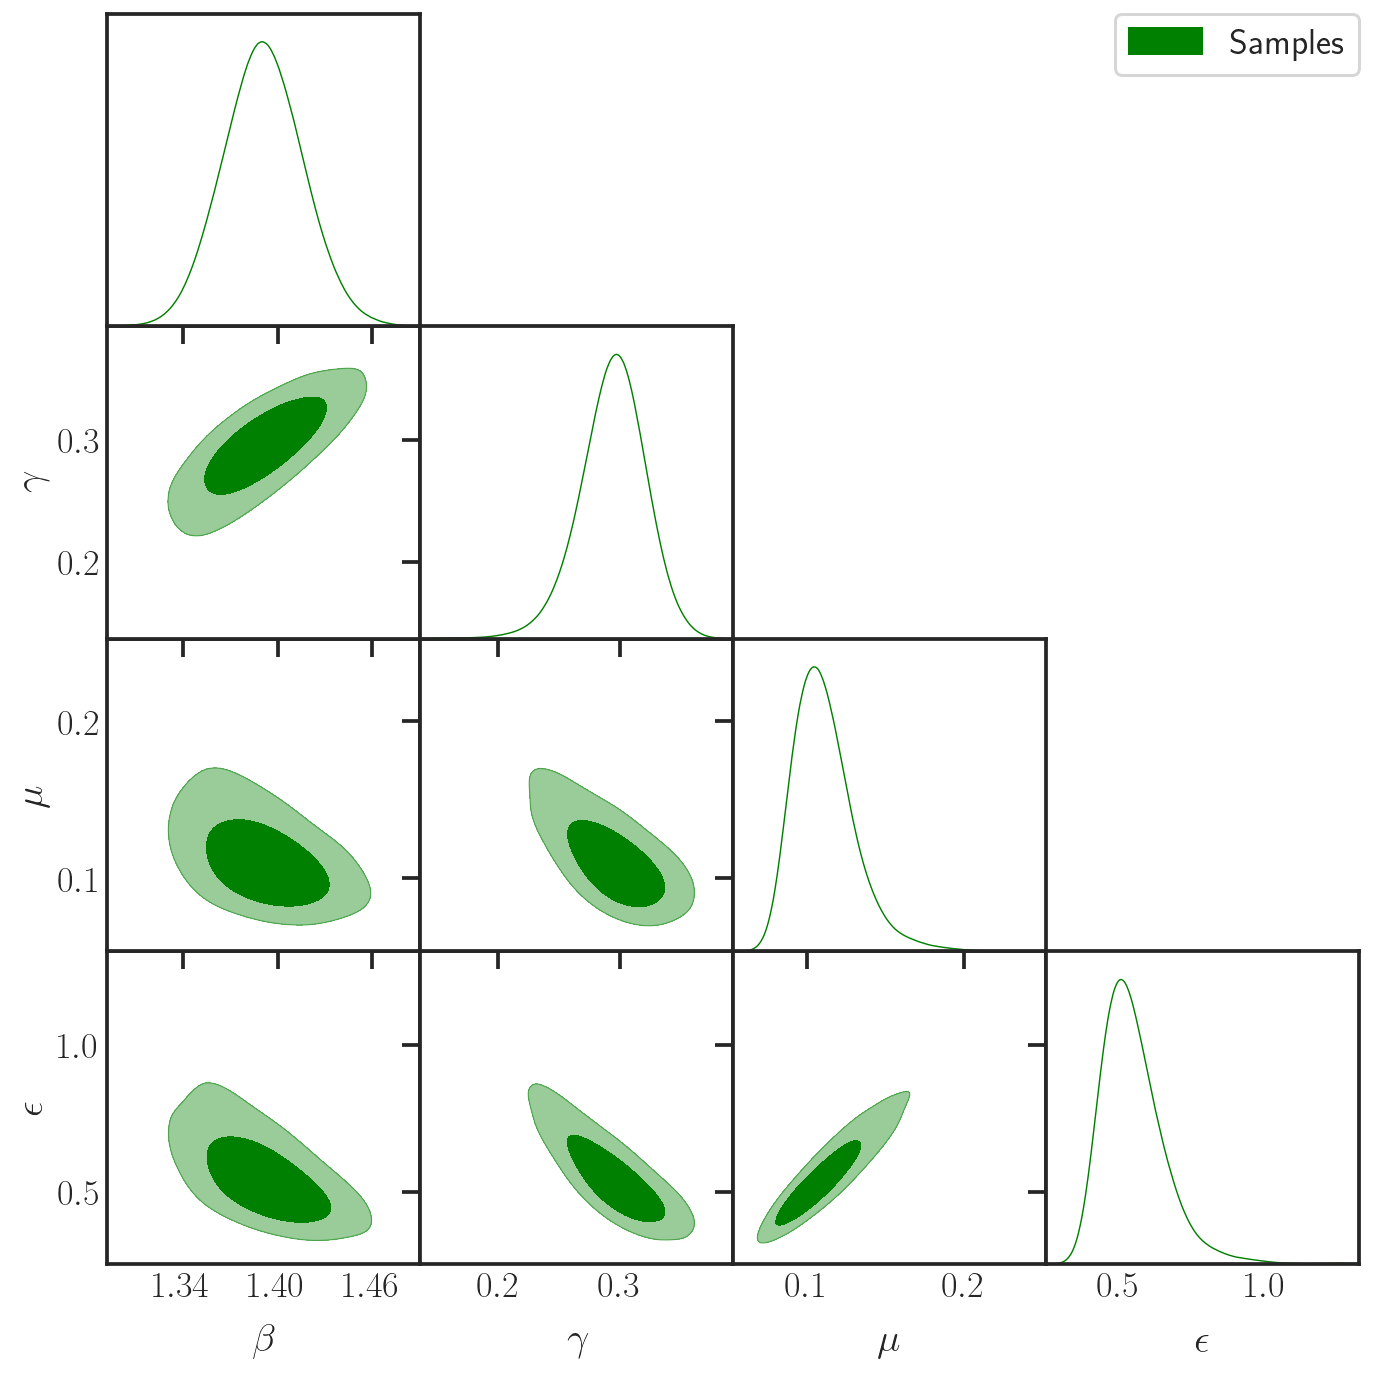

In [5]:
g = plots.getSubplotPlotter(width_inch=10)
#g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 22
g.settings.legend_fontsize = 20
g.triangle_plot([samples], ['p1', 'p2','p3', 'p4'], 
    filled_compare=True, 
    legend_labels=['Samples'], 
    legend_loc='upper right', 
    line_args=[{'ls':'-', 'color':'green'}], 
    contour_colors=['green'])
g.export('Triangle.pdf')

In [6]:
# Many other things you can do besides plot, e.g. get latex
# Default limits are 1: 68%, 2: 95%, 3: 99% probability enclosed
# See  https://getdist.readthedocs.io/en/latest/analysis_settings.html
# and examples for below for changing analysis settings 
# (e.g. 2hidh limits, and how they are defined)
print(samples.getInlineLatex('p1',limit=2))
print(samples.getInlineLatex('p2',limit=2))
print(samples.getInlineLatex('p3',limit=2))
print(samples.getInlineLatex('p4',limit=2))
print(samples.getTable().tableTex())

$\beta$ = 1.391^{+0.050}_{-0.049}
$\gamma$ = 0.294^{+0.054}_{-0.055}
$\mu$ = 0.111^{+0.041}_{-0.036}
$\epsilon$ = 0.55^{+0.22}_{-0.19}
\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\beta$        } & $1.391^{+0.050}_{-0.049}   $\\

{\boldmath$\gamma$       } & $0.294^{+0.054}_{-0.055}   $\\

{\boldmath$\mu$          } & $0.111^{+0.041}_{-0.036}   $\\

{\boldmath$\epsilon$     } & $0.55^{+0.22}_{-0.19}      $\\
\hline
\end{tabular}


In [23]:
print(samples.PCA(['p1','p2']))

PCA for parameters:
         1 :ln(b_0)
         2 :ln(g_0)

Correlation matrix for reduced parameters
          p1 :  1.0000  0.0798
          p2 :  0.0798  1.0000

e-values of correlation matrix
PC 1:   0.9202
PC 2:   1.0798

e-vectors
  1: -0.7071  0.7071
  2:  0.7071  0.7071

Principle components
PC1 (e-value: 0.920213)
[0.013229]  (b_0/1.387436)^{1.000000}
[-0.013229]  (g_0/0.299201)^{-0.324403}
          = 1.000161 +- 0.018018

PC2 (e-value: 1.079787)
[0.013229]  (b_0/1.387436)^{1.000000}
[0.013229]  (g_0/0.299201)^{0.324403}
          = 1.000188 +- 0.019359

Correlations of principle components
       1       2
PC 1   1.000  -0.000
PC 2  -0.000   1.000
   1   0.679   0.734   (b_0)
   2  -0.678   0.734   (g_0)



In [31]:
stats = samples.getMargeStats()
lims0 = stats.parWithName('p1').limits
lims1 = stats.parWithName('p2').limits
# lims2 = stats.parWithName('p3').limits
for conf, lim0, lim1, in zip(samples.contours,lims0, lims1):
    print('p1 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim0.lower, lim0.upper, lim0.limitType()))
    print('p2 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim1.lower, lim1.upper, lim1.limitType()))
    # print('p3 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim2.lower, lim2.upper, lim2.limitType()))

p1 0.68% lower: 1.372 upper: 1.406 (two tail)
p2 0.68% lower: 0.290 upper: 0.311 (two tail)
p1 0.95% lower: 1.349 upper: 1.421 (two tail)
p2 0.95% lower: 0.273 upper: 0.323 (two tail)
p1 0.99% lower: 1.337 upper: 1.442 (two tail)
p2 0.99% lower: 0.261 upper: 0.334 (two tail)
